# Research Question:
# "What factors will affect an employee's decision to leave the company?"
# Hypothesis: 
# "Age, Department, Gender, and Monthly Income are the factors that will affect employee's attrition"
## Observations: 
### y variable: Attrition
### x variables: Age, Department, Gender, Monthly Income

## Importing libraries and API

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
x = api.dataset_list(search="attrition rate of company")
print(*x)

anujachintyabiswas/attrition-rate-of-a-company thedevastator/employee-attrition-and-factors iamsouravbanerjee/software-professional-salaries-2022 colearninglounge/employee-attrition muhammadshahidazeem/customer-churn-dataset saadharoon27/hr-analytics-dataset sanjanchaudhari/employees-performance-for-hr-analytics dhawan123/attrition-rate-data-set prachi13/employeeattritionrate rischan/workshop-shopee-machine-learning-ann-scikitlearn kadirduran/hr-dataset bhavikapuri2811/hr-analytics-dashboard-using-excel rohan0301/hackerearth-ml-will-your-employees-leave-you adityaghuse/employee-attrition-and-engagement synful/churn-classification mohammadkaiftahir/hr-analytics danielggak/summit-biotech-attrition-2021 sunilhit120/ibm-hr-analytics-and-visualization chaudhurimdtausif/company-employee-attrition wrucebaynebot/hr-dataset


In [4]:
api.dataset_list_files('anujachintyabiswas/attrition-rate-of-a-company').files

[general_data.csv]

In [5]:
api.dataset_download_file('anujachintyabiswas/attrition-rate-of-a-company','general_data.csv')

True

## Loading dataset

In [6]:
df=pd.read_csv('general_data.csv')
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [7]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

## Extracting related columns and building a subdf (df1)

In [8]:
df1=df[['Age','Attrition','Department','Gender','MonthlyIncome']]
df1

,Age,Attrition,Department,Gender,MonthlyIncome
0,51,No,Sales,Female,131160
1,31,Yes,Research & Development,Female,41890
2,32,No,Research & Development,Male,193280
3,38,No,Research & Development,Male,83210
4,32,No,Research & Development,Male,23420
...,...,...,...,...,...
4405,42,No,Research & Development,Female,60290
4406,29,No,Research & Development,Male,26790
4407,25,No,Research & Development,Male,37020
4408,42,No,Sales,Male,23980


## Understanding the data

In [9]:
df1.head()

,Age,Attrition,Department,Gender,MonthlyIncome
0,51,No,Sales,Female,131160
1,31,Yes,Research & Development,Female,41890
2,32,No,Research & Development,Male,193280
3,38,No,Research & Development,Male,83210
4,32,No,Research & Development,Male,23420


In [10]:
df1.tail()

,Age,Attrition,Department,Gender,MonthlyIncome
4405,42,No,Research & Development,Female,60290
4406,29,No,Research & Development,Male,26790
4407,25,No,Research & Development,Male,37020
4408,42,No,Sales,Male,23980
4409,40,No,Research & Development,Male,54680


In [11]:
df1.shape

(4410, 5)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            4410 non-null   int64 
 1   Attrition      4410 non-null   object
 2   Department     4410 non-null   object
 3   Gender         4410 non-null   object
 4   MonthlyIncome  4410 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 172.4+ KB


In [13]:
df1.describe()

,Age,MonthlyIncome
count,4410.000000,4410.000000
mean,36.923810,65029.312925
std,9.133301,47068.888559
min,18.000000,10090.000000
25%,30.000000,29110.000000
50%,36.000000,49190.000000
75%,43.000000,83800.000000
max,60.000000,199990.000000


## Cleaning the data

In [14]:
df1.isnull().any()

Age              False
Attrition        False
Department       False
Gender           False
MonthlyIncome    False
dtype: bool

In [15]:
df1.isnull().sum()

Age              0
Attrition        0
Department       0
Gender           0
MonthlyIncome    0
dtype: int64

## Attrition
## Univariate Analysis - Pie chart

Text(0.5, 1.0, 'Attrition Ratio')

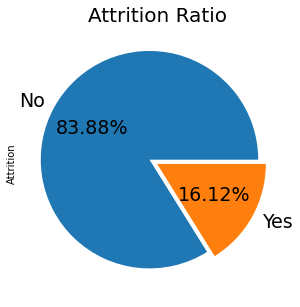

In [16]:
df1['Attrition'].value_counts().plot.pie(autopct='%.2f%%',figsize=(5,5),explode=(0.08,0),textprops={'fontsize': 19})
plt.title('Attrition Ratio',fontsize=20)

## Age
## Univariate Analysis - Distribution plot

Text(0.5, 1.0, 'Distribution of Age')

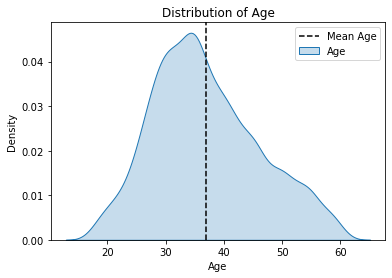

In [17]:
sns.kdeplot(x=df['Age'],shade=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='k',linestyle ="--",label='Mean Age')
plt.legend()
plt.title('Distribution of Age')

In [18]:
print('Mode:',df1['Age'].mode())
print('Median:',df1['Age'].median())
print('Mean:',df1['Age'].mean())

Mode: 0    35
dtype: int64
Median: 36.0
Mean: 36.923809523809524


## Attrition by Age
## Bivariate Analysis - Multi distribution plot

Text(0.5, 1.0, 'Age Distribution of Attrition vs Non-attrition')

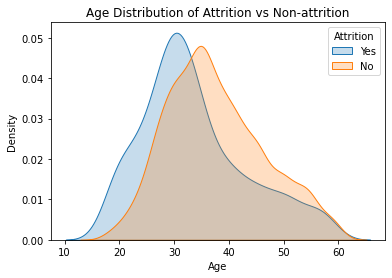

In [19]:
att1=df1.loc[df1['Attrition']=='Yes','Age']
att2=df1.loc[df1['Attrition']=='No','Age']
sns.kdeplot(att1,shade=True,label='Yes')
sns.kdeplot(att2,shade=True,label='No')
plt.legend(title='Attrition')
plt.title('Age Distribution of Attrition vs Non-attrition')

In [20]:
print('Mode:',att1.mode())
print('Median:',att1.median())
print('Mean:',att1.mean())

Mode: 0    29
1    31
dtype: int64
Median: 32.0
Mean: 33.607594936708864


## Attrition by Department
## Bivariate Analysis - Crosstab

Text(0.5, 1.0, 'Attrition by Department')

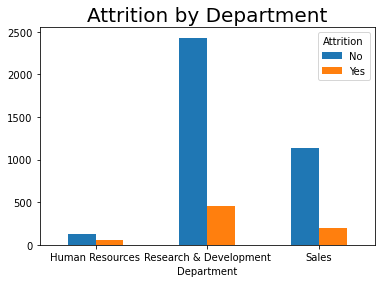

In [21]:
pd.crosstab(df1['Department'],df1['Attrition']).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Attrition by Department',fontsize=20)

## Gender
## Univariate Analysis - Pie chart

Text(0.5, 1.0, 'Gender Ratio')

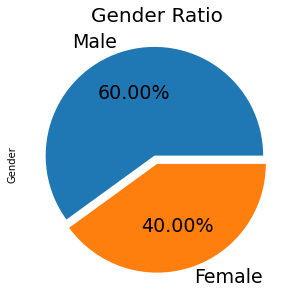

In [22]:
df1['Gender'].value_counts().plot.pie(autopct='%.2f%%',figsize=(5,5),explode=(0.08,0),textprops={'fontsize': 19})
plt.title('Gender Ratio',fontsize=20)

Text(0.5, 1.0, 'Gender Ratio of Attrited Employees')

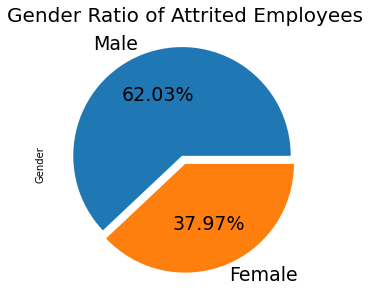

In [23]:
df2=df1[(df1['Attrition']=="Yes")]
df2['Gender'].value_counts().plot.pie(autopct='%.2f%%',figsize=(5,5),explode=(0.08,0),textprops={'fontsize': 19})
plt.title('Gender Ratio of Attrited Employees',fontsize=20)

## Attrition by Monthly Income
## Bivariate Analysis - Multi distribution plot

Text(0.5, 1.05, 'Monthly Income Distribution of Attrition vs Non-attrition')

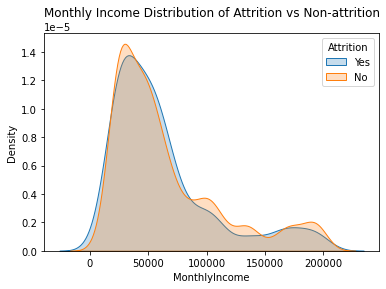

In [24]:
att1=df1.loc[df1['Attrition']=='Yes','MonthlyIncome']
att2=df1.loc[df1['Attrition']=='No','MonthlyIncome']
sns.kdeplot(att1,shade=True,label='Yes')
sns.kdeplot(att2,shade=True,label='No')
plt.legend(title='Attrition')
plt.title('Monthly Income Distribution of Attrition vs Non-attrition',y=1.05)

## Dealing with Categorical Data

In [25]:
en=LabelEncoder()
df1['Attrition'] = en.fit_transform(df1['Attrition'])
df1.head()

C:\Users\SIAOSH~1\AppData\Local\Temp/ipykernel_14952/2635718449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Attrition'] = en.fit_transform(df1['Attrition'])


,Age,Attrition,Department,Gender,MonthlyIncome
0,51,0,Sales,Female,131160
1,31,1,Research & Development,Female,41890
2,32,0,Research & Development,Male,193280
3,38,0,Research & Development,Male,83210
4,32,0,Research & Development,Male,23420


In [26]:
en=LabelEncoder()
df1['Gender'] = en.fit_transform(df1['Gender'])
df1.head()

C:\Users\SIAOSH~1\AppData\Local\Temp/ipykernel_14952/281485192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'] = en.fit_transform(df1['Gender'])


,Age,Attrition,Department,Gender,MonthlyIncome
0,51,0,Sales,0,131160
1,31,1,Research & Development,0,41890
2,32,0,Research & Development,1,193280
3,38,0,Research & Development,1,83210
4,32,0,Research & Development,1,23420


In [27]:
df1=pd.concat([df1,pd.get_dummies(df1['Department'],drop_first=True)],axis=1,join='inner')
df1

,Age,Attrition,Department,Gender,MonthlyIncome,Research & Development,Sales
0,51,0,Sales,0,131160,0,1
1,31,1,Research & Development,0,41890,1,0
2,32,0,Research & Development,1,193280,1,0
3,38,0,Research & Development,1,83210,1,0
4,32,0,Research & Development,1,23420,1,0
...,...,...,...,...,...,...,...
4405,42,0,Research & Development,0,60290,1,0
4406,29,0,Research & Development,1,26790,1,0
4407,25,0,Research & Development,1,37020,1,0
4408,42,0,Sales,1,23980,0,1


## Dealing with Numerical Data

In [28]:
scale=StandardScaler()
df1[['Age','MonthlyIncome']]=scale.fit_transform(df1[['Age','MonthlyIncome']])
df1

,Age,Attrition,Department,Gender,MonthlyIncome,Research & Development,Sales
0,1.541369,0,Sales,0,1.405136,0,1
1,-0.648668,1,Research & Development,0,-0.491661,1,0
2,-0.539166,0,Research & Development,1,2.725053,1,0
3,0.117845,0,Research & Development,1,0.386301,1,0
4,-0.539166,0,Research & Development,1,-0.884109,1,0
...,...,...,...,...,...,...,...
4405,0.555852,0,Research & Development,0,-0.100700,1,0
4406,-0.867672,0,Research & Development,1,-0.812504,1,0
4407,-1.305679,0,Research & Development,1,-0.595138,1,0
4408,0.555852,0,Sales,1,-0.872210,0,1


## Attrition by Age, Gender, Monthly Income & Department
## Advanced Visualization - Pairplot

In [29]:
df1.columns

Index(['Age', 'Attrition', 'Department', 'Gender', 'MonthlyIncome',
       'Research & Development', 'Sales'],
      dtype='object')

Text(0.5, 1.01, 'Y variables (Attrition) by X variables (Age, Gender, Monthly Income, Department)')

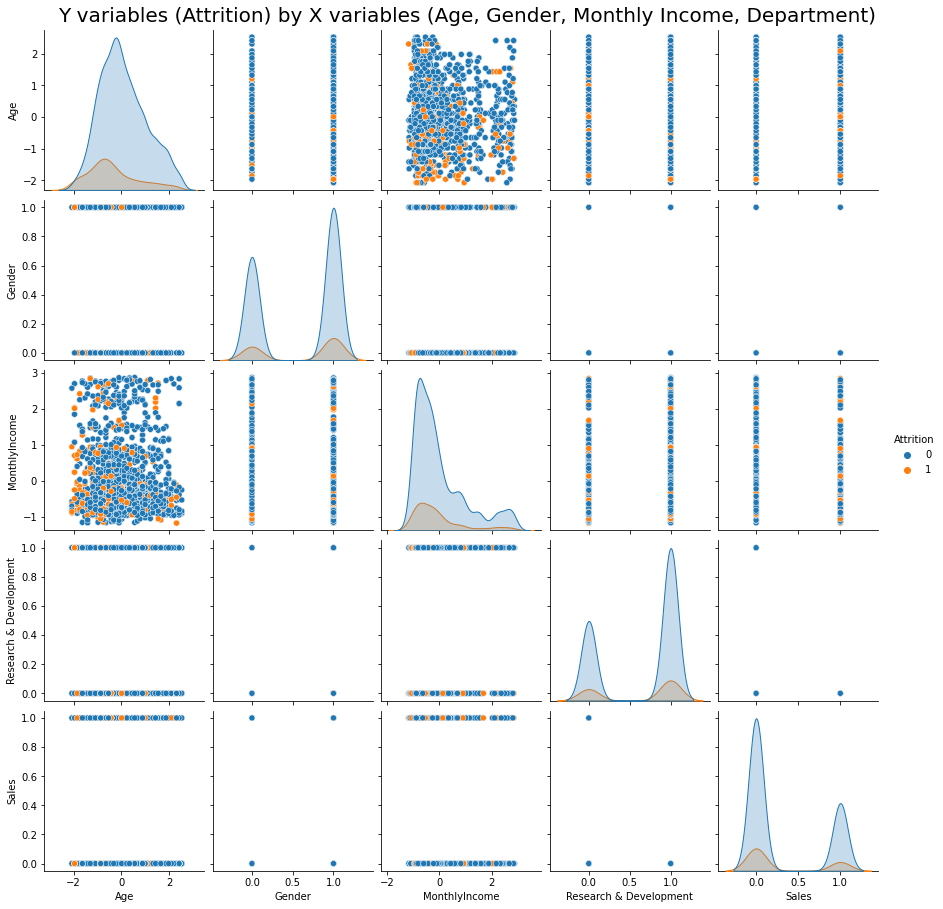

In [30]:
#hue: variable('Attrition') in data to map plot aspects to different colors.
sns.pairplot(df1,hue='Attrition').fig.suptitle('Y variables (Attrition) by X variables (Age, Gender, Monthly Income, Department)',fontsize=20,y=1.01)

## Age, Attrition, Gender, Monthly Income & Department
## Multivariate Analysis - Heatmap

<AxesSubplot:title={'center':'Pearson Correlation'}>

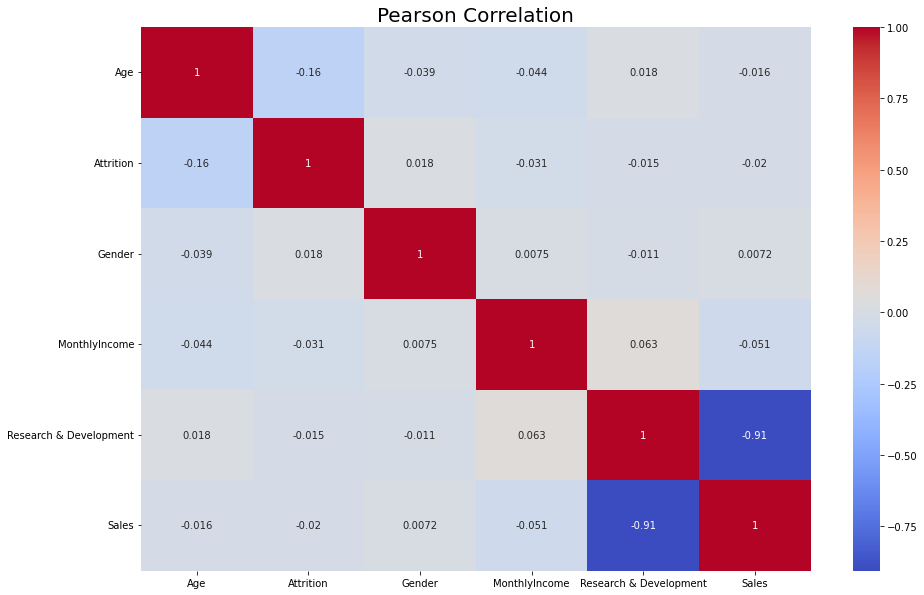

In [31]:
plt.subplots(figsize=(15,10))
plt.title('Pearson Correlation',fontsize=20)
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

## Logistic Regression

In [32]:
y=df1['Attrition']
x=df1[['Age','Gender','MonthlyIncome','Research & Development','Sales']]

In [33]:
import statsmodels.api as sm
model=sm.Logit(y,x)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.428548
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4405
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                 0.02977
Time:                        15:48:00   Log-Likelihood:                -1889.9
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.896e-24
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                       -0.4748      0.046    -10.410      0.000      -0.564      